# 探索的データ分析

In [2]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [3]:
"""データの読込"""
train_df = pd.read_csv("../data/train.csv", index_col=0)
test_df = pd.read_csv("../data/test.csv", index_col=0)

train_df.head()

,purpose,int.rate,installment,annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,NaN,0.1691,652.10,29579.74,10.66,730,3333,4955.0,39.6,4,2,0,1
1,major_purchase,0.1354,191.27,52808.95,13.06,707,6063,12335.0,37.8,2,1,0,0
2,credit_card,0.0758,377.00,168689.22,11.98,736,2681,1505.0,5.0,1,0,0,0
3,debt_consolidation,0.1774,359.33,71325.19,20.55,702,3972,39536.0,94.1,1,0,0,0
4,credit_card,0.1430,875.45,130773.88,17.61,688,5555,17295.0,56.4,0,0,0,0


### 目的変数（not.fully.paid）の偏り

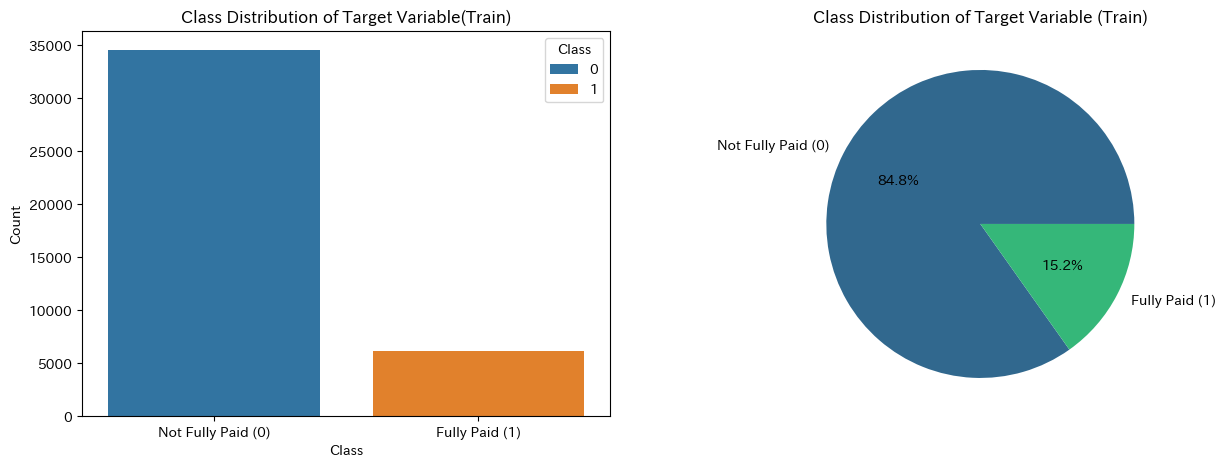

In [4]:
# 目的変数のクラス分布を集計
class_counts = train_df['not.fully.paid'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# クラスの割合を計算
class_counts['Percentage'] = class_counts['Count'] / class_counts['Count'].sum() * 100

# 棒グラフのプロット
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(data=class_counts, x="Class", y="Count", hue="Class", ax=ax[0])
ax[0].set(xlabel='Class', ylabel='Count', title='Class Distribution of Target Variable(Train)')
ax[0].set_xticks([0, 1], ['Not Fully Paid (0)', 'Fully Paid (1)'])

# 円グラフのプロット
colors = sns.color_palette("viridis", len(class_counts))
ax[1].pie(class_counts['Count'], labels=['Not Fully Paid (0)', 'Fully Paid (1)'], autopct='%1.1f%%', colors=colors)
ax[1].set_title('Class Distribution of Target Variable (Train)')
plt.show()


### 仮説1
金利が高いほど、未返済の可能性が高い

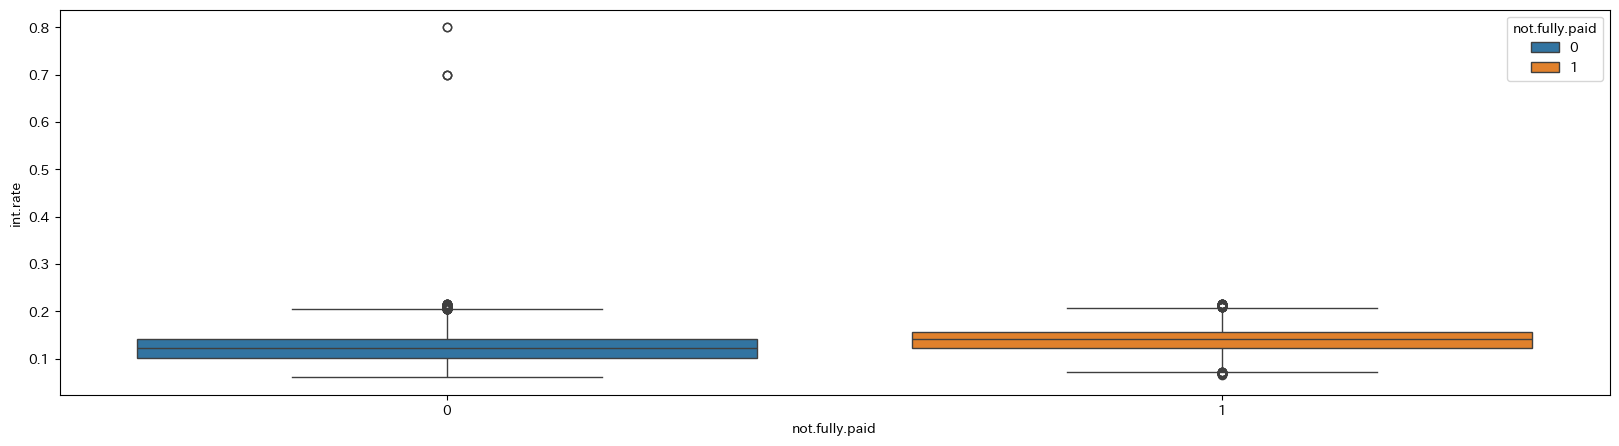

In [8]:
"""purposeごとに各目的におけるローンの利息の箱ひげ図"""
plt.figure(figsize=(20, 5))

# 外れ値（int.rate > 0.5）を除いた箱ひげ図
tmp = train_df[train_df["int.rate"] < 0.5]

sns.boxplot(data=train_df, y="int.rate", x="not.fully.paid", hue="not.fully.paid")
plt.show()